In [ ]:
import os
os.environ["CURL_CA_BUNDLE"]='/etc/ssl/certs/ca-certificates.crt'

!pip install pystac-client==0.3.2 rasterio shapely matplotlib tqdm
!pip install folium==0.2.1
!pip install jenkspy
!pip install InSpectral-1.3.tar.gz


import pystac_client
import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import from_bounds
from matplotlib import pyplot as plt
from rasterio.plot import show
import numpy as np
from osgeo import gdal
import jenkspy
from InSpectral import *

#conecção com BDC
parameters = dict(access_token='jeXchZiqYZ5I1ybxouubE1E0K58IHwY55rNp1vD2O5')
service = pystac_client.Client.open('https://brazildatacube.dpi.inpe.br/stac/', parameters=parameters)

     |████████████████████████████████| 69 kB 4.8 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=db25fb9d518226b25d971dfe271107d9903283148f82aa7c475418b9c1b5e0c8
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 55 kB 3.5 MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=72618 sha256=7759f2b1d4577f49e0bc4c969ab3dd833349cce9c9241dcff267660976a22671
  Stored in directory: /root/.cache/pip/wheels/d8/d1/42/9bd05164ef706b84674905892f0542f8db6ac4a652473ca7e0
Successfully built jenkspy
Processing ./InSpectral-1.3.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... 

In [ ]:
#ler janela raster com numpy
def read(uri: str, bbox: list, masked: bool = True, crs: str = None):
    """Read raster window as numpy.ma.masked_array."""
    source_crs = CRS.from_string('EPSG:4326')
    if crs:
        source_crs = CRS.from_string(crs)

    # Expects the bounding box has 4 values
    w, s, e, n = bbox
        
    with rasterio.open(uri) as dataset:
        transformer = transform(source_crs, dataset.crs, [w, e], [s, n])
        window = from_bounds(transformer[0][0], transformer[1][0], 
                             transformer[0][1], transformer[1][1], dataset.transform)
        return dataset.read(1, window=window, masked=masked)        

RETÂNGULO ENVOLVENTE
Escolha entre as coleções abaixo:
CB4_64_16D_STK-1 
LC8_30_16D_STK-1 
S2_L2A-1 

Copie e cole o satélite/sensor que quer observar: CB4_64_16D_STK-1
Até quantas imagens gostaria de observar? 10
Escolha da lista abaixo a imagem que deseja calcular o índice (primeiro item é 0)
<Item id=CB4_64_16D_STK_v001_022027_2020-12-18_2020-12-31>
<Item id=CB4_64_16D_STK_v001_022027_2020-12-02_2020-12-17>
<Item id=CB4_64_16D_STK_v001_022027_2020-11-16_2020-12-01>
<Item id=CB4_64_16D_STK_v001_022027_2020-10-31_2020-11-15>
<Item id=CB4_64_16D_STK_v001_022027_2020-10-15_2020-10-30>
<Item id=CB4_64_16D_STK_v001_022027_2020-09-29_2020-10-14>
<Item id=CB4_64_16D_STK_v001_022027_2020-09-13_2020-09-28>
<Item id=CB4_64_16D_STK_v001_022027_2020-08-28_2020-09-12>
<Item id=CB4_64_16D_STK_v001_022027_2020-08-12_2020-08-27>
<Item id=CB4_64_16D_STK_v001_022027_2020-07-27_2020-08-11>
Escolha qual imagem da lista acima quer visualizar (0 - n). Obs.: primeira imagem inicia em zero: 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


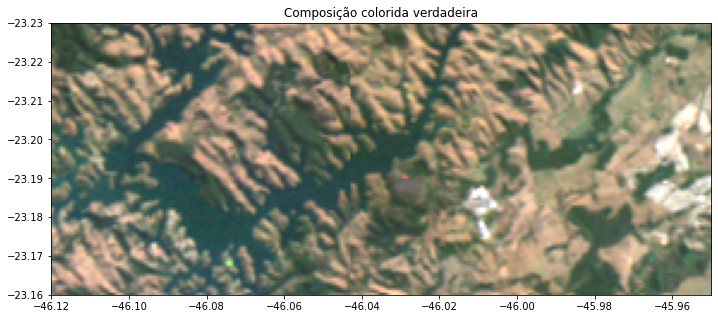

Observe se a imagem esta coberta com nuvens. Quer escolher outra imagem? (s/n): n


In [ ]:
#INPUT DO USUÁRIO

print('RETÂNGULO ENVOLVENTE')

#xmin = float(input('Coloque coordenada oeste -> ')) # -46.12
#ymin = float(input('Coloque coordenada sul -> ')) # -23.23
#xmax = float(input('Coloque coordenada leste -> ')) # -45.95
#ymax = float(input('Coloque coordenada norte -> ')) # -23.16

xmin = -46.12
ymin = -23.23
xmax = -45.95
ymax = -23.16

bbox = (xmin, ymin, xmax, ymax)


#date = input('Coloque o intervalo de data em AAAA-MM-DD/AAAA-MM-DD: ', ) 
date = ('2020-01-01/2020-12-31')

#loop de escolha de imagem 
opc = 's' #opção sim

res = 'NaN' #opção diferente de sim

while opc.lower() == 's':
  
  print('Escolha entre as coleções abaixo:')

  print("CB4_64_16D_STK-1 \n"
        "LC8_30_16D_STK-1 \n"
        "S2_L2A-1 \n")

  #escolhendo o satélite
  colecao = [str(input('Copie e cole o satélite/sensor que quer observar: ', ))] #LC8_30_16D_STK-1
  colecao

  #estabelecendo um limite de imagens para escolha
  limite = int(input('Até quantas imagens gostaria de observar? ', )) #10

  #criando os items
  item_search = service.search(bbox=bbox,
                              datetime=date,
                              collections=colecao,
                              max_items=limite)
  item_search

  items = list(item_search.get_items())

  #escolhendo a imagem que quer calcular os indices
  print('Escolha da lista abaixo a imagem que deseja calcular o índice (primeiro item é 0)')
  for item in item_search.get_items():
      print(item)

  #usuario escolhe a opção da lista apresentada
  img_choice = int(input('Escolha qual imagem da lista acima quer visualizar (0 - n). Obs.: primeira imagem inicia em zero: ')) #8

  assets = item.assets

  item = items[img_choice]
  item


  #Leitura de banda para cada satélite
  ##Landsat 8
  if  colecao == ['LC8_30_16D_STK-1']:
    red_band = read(item.assets['band4'].href, bbox=bbox)
    nir_band = read(item.assets['band5'].href, bbox=bbox)
    green_band = read(item.assets['band2'].href, bbox=bbox)
    blue_band = read(item.assets['band3'].href, bbox=bbox)
    
    
    ##Sentinel 2
  if colecao == ['S2_L2A-1']:
    red_band = read(item.assets['B04'].href, bbox=bbox)
    nir_band = read(item.assets['B08'].href, bbox=bbox)
    green_band = read(item.assets['B03'].href, bbox=bbox)
    blue_band = read(item.assets['B02'].href, bbox=bbox)

    #CBERS 4
  if colecao == ['CB4_64_16D_STK-1']:
    red_band = read(item.assets['BAND15'].href, bbox=bbox)
    nir_band = read(item.assets['BAND16'].href, bbox=bbox)
    green_band = read(item.assets['BAND14'].href, bbox=bbox)
    blue_band = read(item.assets['BAND13'].href, bbox=bbox)

  #plot rgb imagem de consulta
  linhas = blue_band.shape[0]
  colunas = blue_band.shape[1]
  gain = 1.8

  array_rgb = np.zeros((linhas, colunas, 3))

  array_rgb[:, :, 0] = red_band / red_band.max()
  array_rgb[:, :, 1] = green_band / green_band.max()
  array_rgb[:, :, 2] = blue_band / blue_band.max()

  array_rgb_gain = array_rgb.copy()
  array_rgb_gain *= gain

  plt.figure(figsize=(20, 5))
  plt.imshow(array_rgb_gain, extent = (xmin, xmax, ymax, ymin))
  plt.title('Composição colorida verdadeira');
  plt.pause(0.1)

  opc = input('Observe se a imagem esta coberta com nuvens. Quer escolher outra imagem? (s/n): ')

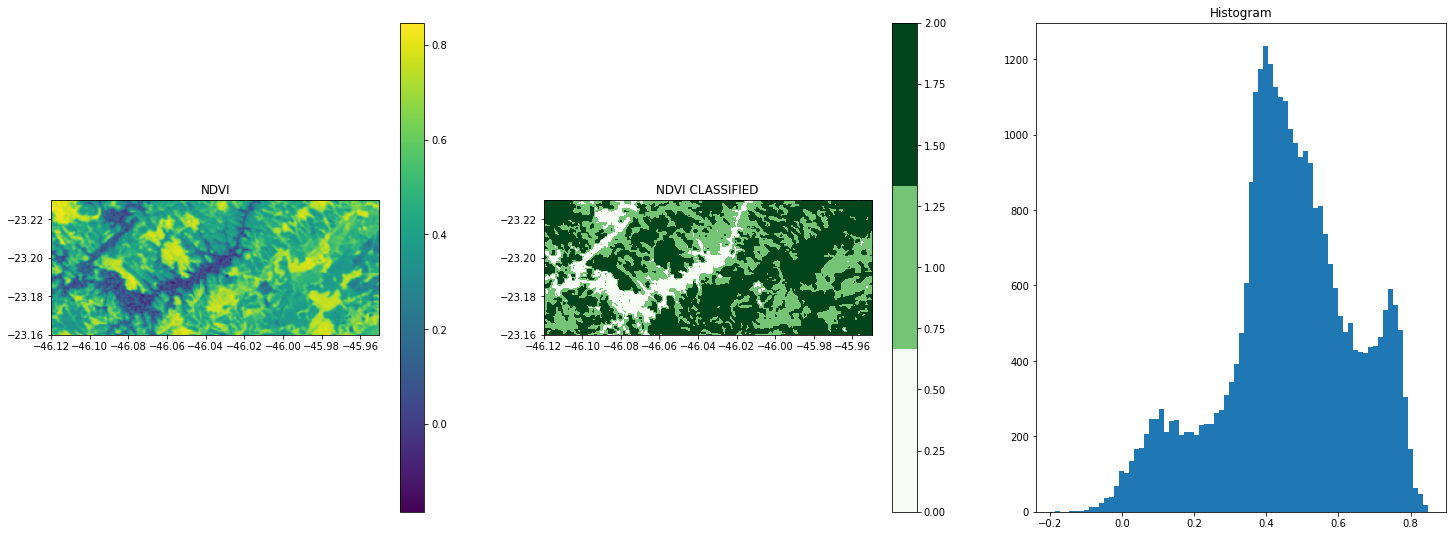

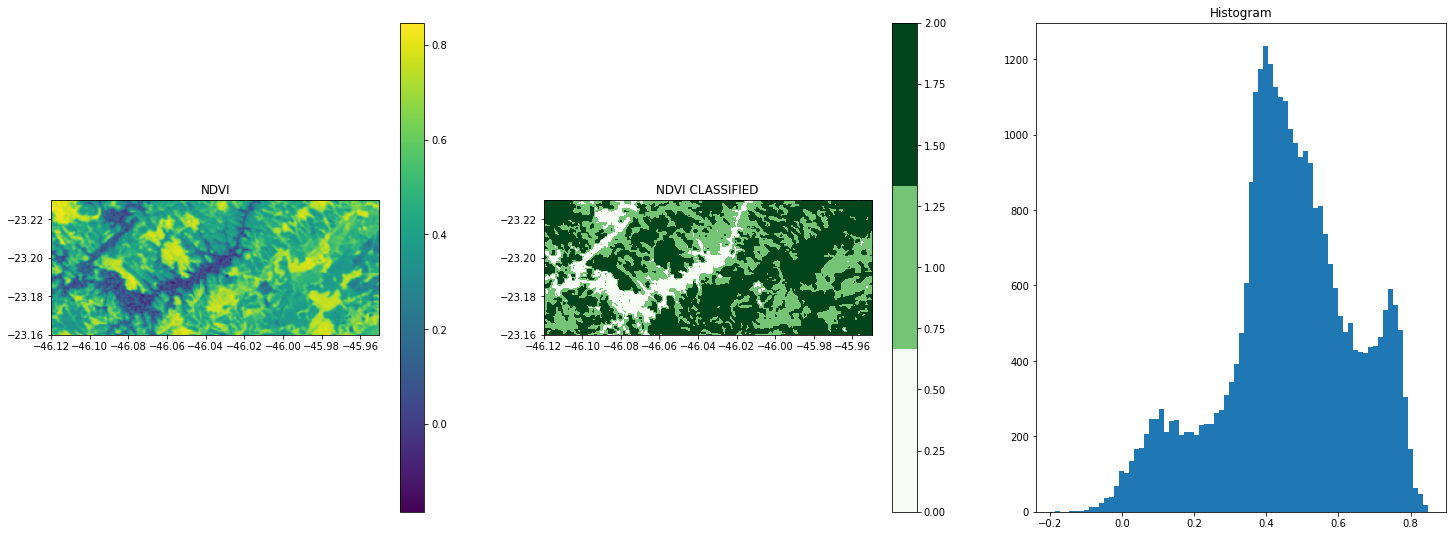

In [ ]:
 plot_ndvi(red_band, nir_band, xmin, xmax, ymax, ymin)

Qual índice gostaria de computar?ndvi


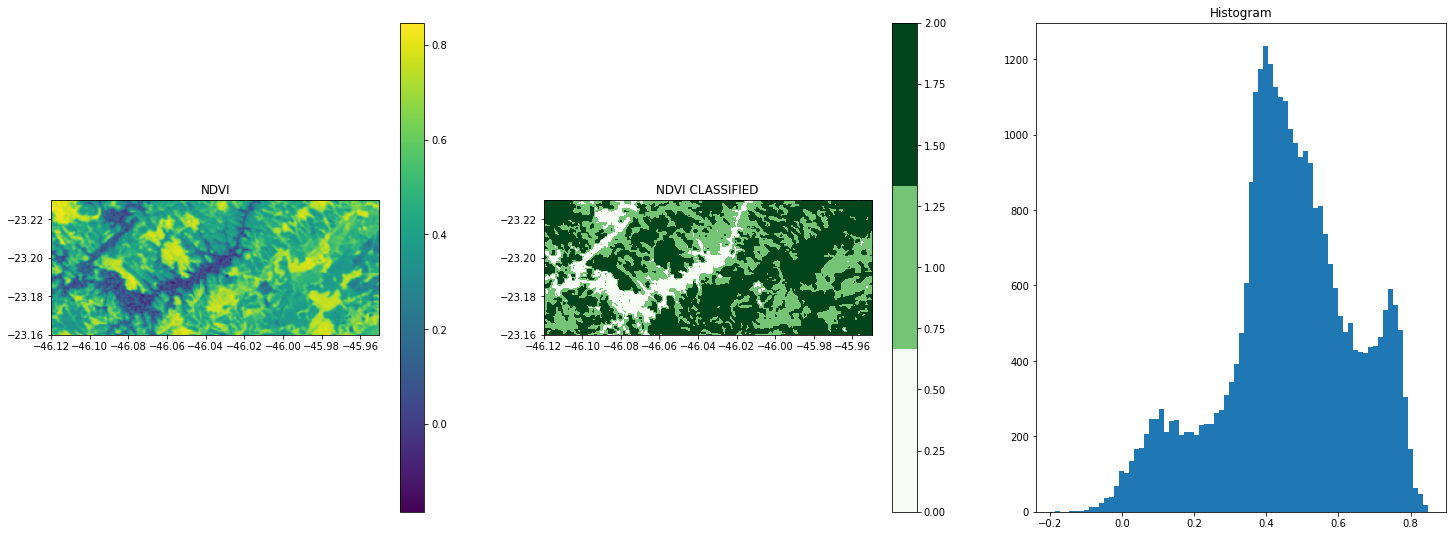

Gostaria de computar outro índice? (s/n): s
Qual índice gostaria de computar?ndwi


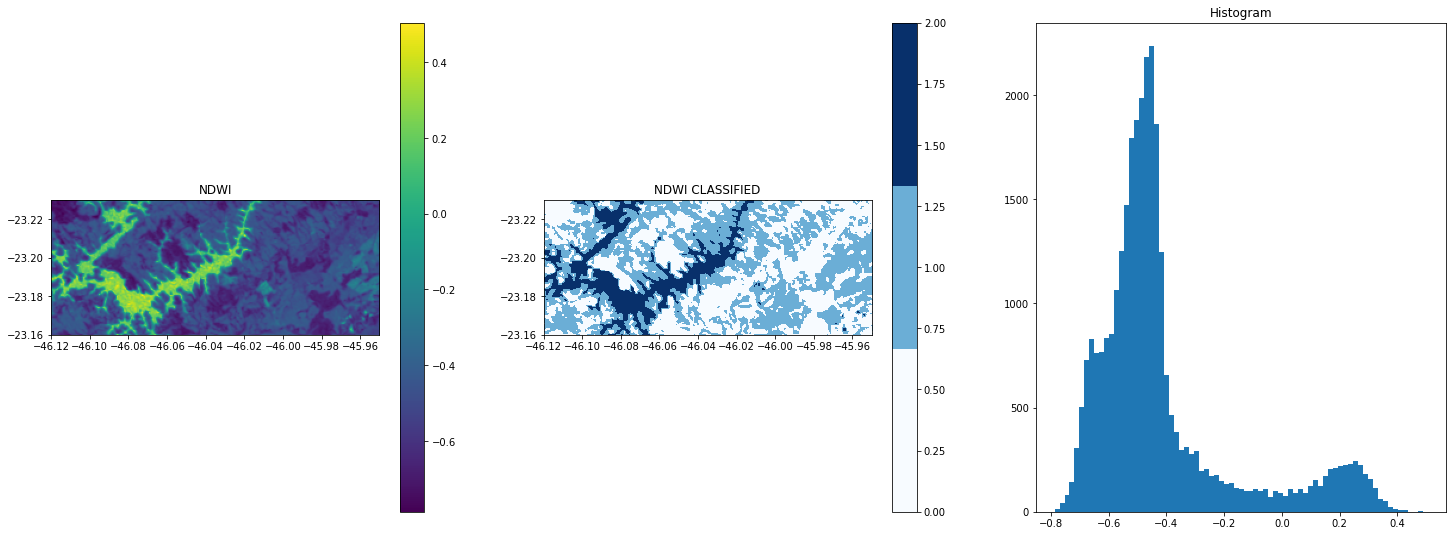

Gostaria de computar outro índice? (s/n): n


In [ ]:
#loop de escolha do indice
opc = 's' #opção sim
res = 'NaN' #opção diferente de sim

while opc.lower() == 's': 
  
  #Pergunta ao usuário qual índice quer computar

  index = str(input('Qual índice gostaria de computar?')).upper()

  if index == 'NDVI':
    plot_ndvi(red_band, nir_band, xmin, xmax, ymax, ymin)
    plt.pause(0.1)

  if index == 'NDWI':
    plot_ndwi(green_band, nir_band, xmin, xmax, ymax, ymin)
    plt.pause(0.1)

  if index == 'EVI':
    plot_evi(nir_band, red_band, blue_band, xmin, xmax, ymax, ymin)
    plt.pause(0.1)

  if index == 'SAVI':
    plot_savi(nir_band, red_band, xmin, xmax, ymax, ymin, L=0.5)
    plt.pause(0.1)

  if index == 'NPCI':
    plot_npci(red_band, blue_band, xmin, xmax, ymax, ymin)
    plt.pause(0.1)

  if index == 'SR':
    plot_sr(nir_band, red_band, xmin, xmax, ymax, ymin)
    plt.pause(0.1)

  if index == 'GLI':
    plot_gli(green_band, red_band, blue_band, xmin, xmax, ymax, ymin)
    plt.pause(0.1)

  opc = input('Gostaria de computar outro índice? (s/n): ')